In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #for legend
!pip install netCDF4
import netCDF4 as nc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00


In [ ]:
file_path1 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2010_1_15_2010_5_28_ESROB.nc'
file_path2 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2010_7_27_2010_5_18_ESROB.nc'
file_path3 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2011_4_14_2011_10_19_ESROB.nc'
file_path4 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2012_7_8_2013_6_10_ESROB.nc'
file_path5 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2013_6_13_2014_9_17_ESROB.nc'
file_path6 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2014_9_19_2015_9_6_ESROB.nc'
file_path7 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2015_9_24_2015_12_9_ESROB.nc'
file_path8 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2015_12_9_2016_8_01_ESROB.nc'
file_path9 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2016-08-05_2017-10-16_ESROB.nc'
file_path10 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2018_09_19_2019_07_11_ESROB.nc'
file_path11 = '/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/2019_07_26_2020_10_27_ESROB.nc'
file_paths = [file_path1, file_path2, file_path3, file_path4 ,file_path5,file_path6,file_path7, file_path8, file_path9 ,file_path10,file_path11]
nc_file1 = nc.Dataset(file_path1, 'r')
nc_file2 = nc.Dataset(file_path2, 'r')
nc_file3 = nc.Dataset(file_path3, 'r')
nc_file4 = nc.Dataset(file_path4, 'r')
nc_file5 = nc.Dataset(file_path5, 'r')
nc_file6 = nc.Dataset(file_path6, 'r')
nc_file7 = nc.Dataset(file_path7, 'r')
nc_file8 = nc.Dataset(file_path8, 'r')
nc_file9 = nc.Dataset(file_path9, 'r')
nc_file10 = nc.Dataset(file_path10, 'r')
nc_file11 = nc.Dataset(file_path11, 'r')

Time_change

In [ ]:
nc_files = [nc_file1, nc_file2, nc_file3, nc_file4 ,nc_file5,
            nc_file6, nc_file7, nc_file8, nc_file9 ,nc_file10 ,nc_file11]
new_df = []
for nc_file in nc_files :
  time = nc_file.variables['Time'][:]
  base_date = pd.Timestamp('1950-01-01T00:00:00Z')
  time_in_datetime = [base_date + pd.Timedelta(days =float(t)) for t in time]
  date_values = [timestamp.strftime('%Y-%m-%d-%H-%M-%S') for timestamp in time_in_datetime]
  df = pd.DataFrame(data = {'Date': date_values})
  df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']] = df['Date'].str.split('-').apply(pd.Series)
  df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
  df = df[['date', 'Hour', 'Minute']]
  try:
    df["temp_surf"] = nc_file.variables['temp39_surf'][0] #surf
    df["0.1-0.5m"] = (nc_file.variables['temp56_surf'][:][0] + nc_file.variables['temp56_surf'][:][1]+ nc_file.variables['temp56_surf'][:][2])/3
    df["15m"] = nc_file.variables['temp56_sub'][:][0]
    df["30m"] = nc_file.variables['temp56_sub'][:][1]
    df["5m"] = nc_file.variables['temp'][:][0]
    df["20m"] = nc_file.variables['temp'][:][1]
    df["40m"] = nc_file.variables['temp'][:][2]
    df["60m"] = nc_file.variables['temp'][:][3]
    df["80m"] = nc_file.variables['temp'][:][4]
  except KeyError:
    pass
  new_df.append(df)

In [ ]:
df = pd.concat(new_df, ignore_index=True)
df = df.groupby("date").mean().reset_index()
ESROB_depth = df.rename(columns={'date': 't'}) #ESROB_depth data
ESROB_depth

<ipython-input-7-f65c1ace2aac>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("date").mean().reset_index()


,t,temp_surf,0.1-0.5m,15m,30m,5m,20m,40m,60m,80m
0,2010-01-14,9.670039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-15,9.606712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-16,9.074583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-17,9.210211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-18,9.293791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3236,2020-10-23,18.285342,18.190646,18.143709,15.831047,NaN,NaN,NaN,NaN,NaN
3237,2020-10-24,18.669016,18.637795,18.412863,17.633335,NaN,NaN,NaN,NaN,NaN
3238,2020-10-25,18.825334,18.835942,18.839267,17.868656,NaN,NaN,NaN,NaN,NaN
3239,2020-10-26,18.648707,18.642651,18.494957,17.786999,NaN,NaN,NaN,NaN,NaN


Data Combine

In [ ]:
join_climate = pd.read_csv("/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/ESROB_location/ESROB_location_mhw_clim.csv")
join_event = pd.read_csv("/content/drive/MyDrive/Yeongsil_Miracle/ESROB_dataset/ESROB_location/ESROB_location_mhw_clustering.csv")
ESROB_depth['t'] = pd.to_datetime(ESROB_depth['t'])
join_climate['t'] = pd.to_datetime(join_climate['t'])
#data combine
merged_df = ESROB_depth.merge(join_climate, on='t', how='inner') #climate combine
depth = ["temp_surf" , "0.1-0.5m","5m", "15m" , "20m" ,"30m", "40m" , "60m" ,"80m"]
merged_df = merged_df[["t"] + ["temp"] +depth + ["event_no"]]
join_event = join_event[["event_no"] + ["duration"] + ["date_peak"] + ["cluster"]]
merged_df2 = merged_df.merge(join_event, on='event_no', how='left') #event combine

mdf= merged_df2.dropna(subset=['event_no'])
mdf['t'] = pd.to_datetime(mdf['t'])
mdf['date_peak'] = pd.to_datetime(mdf['date_peak'])
mdf['running_time'] = (mdf['t'] - mdf['date_peak']).dt.days
mdf["OSTIA_temp"] = mdf["temp"] - 273.15
mdf

<ipython-input-16-515b085adab7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['t'] = pd.to_datetime(mdf['t'])
<ipython-input-16-515b085adab7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['date_peak'] = pd.to_datetime(mdf['date_peak'])
<ipython-input-16-515b085adab7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,t,temp,temp_surf,0.1-0.5m,5m,15m,20m,30m,40m,60m,80m,event_no,duration,date_peak,cluster,running_time,OSTIA_temp
508,2011-08-31,298.559993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,2011-09-02,1.0,-2,25.409993
509,2011-09-01,298.619993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,2011-09-02,1.0,-1,25.469993
510,2011-09-02,298.789993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,2011-09-02,1.0,0,25.639993
511,2011-09-03,298.489993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,2011-09-02,1.0,1,25.339993
512,2011-09-04,298.259993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,2011-09-02,1.0,2,25.109993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,2020-05-01,288.669993,15.081796,15.103080,14.859726,13.991374,13.355322,9.679926,7.357311,4.620315,1.789904,92.0,5.0,2020-05-01,2.0,0,15.519993
3062,2020-05-02,288.639994,15.676400,15.961137,15.095611,14.222189,13.423800,9.966211,7.467756,4.283622,1.649600,92.0,5.0,2020-05-01,2.0,1,15.489994
3063,2020-05-03,288.409994,15.358427,15.353256,15.277692,13.716242,13.028192,10.474981,7.865296,4.827523,1.831800,92.0,5.0,2020-05-01,2.0,2,15.259994
3064,2020-05-04,288.409994,15.208900,15.183193,14.710600,14.410400,12.208400,8.398100,6.148400,3.880400,1.660800,92.0,5.0,2020-05-01,2.0,3,15.259994


Visualization of Depth by Cluster

In [ ]:
mdf1 =mdf[mdf["cluster"] == 0]
mdf2 =mdf[mdf["cluster"] == 1]
mdf3 =mdf[mdf["cluster"] == 2]
mdf4 =mdf[mdf["cluster"] == 3]
mdfs = [mdf1,mdf2,mdf3,mdf4]

In [ ]:
def generate_combined_mean_series(cluster, columns, depth_col):
    pivot_dataframes = []

    for column in columns:
        pivot_df = cluster.pivot(index='event_no', columns='running_time', values=column)
        pivot_df.columns = [f'{col}' for col in pivot_df.columns]
        mean_series = pivot_df.mean(axis=0).T
        pivot_dataframes.append(mean_series)

    combined_mean_series = pd.concat(pivot_dataframes, axis=1)
    combined_mean_series.columns = columns
    combined_mean_series.index = combined_mean_series.index.map(lambda x: f'{x}')
    combined_mean_series.index.name = 'running_time'
    return combined_mean_series

columns = ['OSTIA_temp', '0.1-0.5m', '5m', '15m', '20m', '30m', '40m', '60m', '80m']
depth_col = [0, 0.3, 5, 15, 20, 30, 40, 60, 80]

cluster1 = generate_combined_mean_series(mdfs[0], columns, depth_col)
cluster2 = generate_combined_mean_series(mdfs[1], columns, depth_col)
cluster3 = generate_combined_mean_series(mdfs[2], columns, depth_col)
cluster4 = generate_combined_mean_series(mdfs[3], columns, depth_col)
clusters = [cluster1 ,cluster2 ,cluster3 ,cluster4 ]

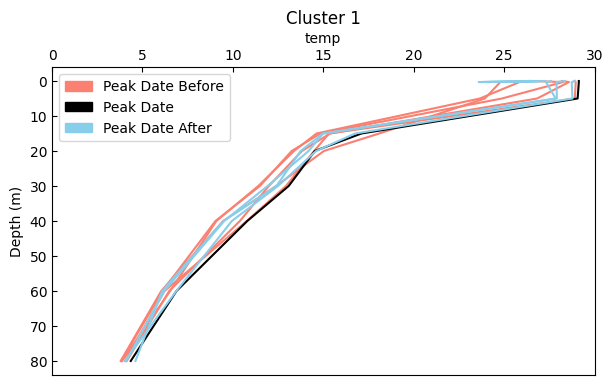

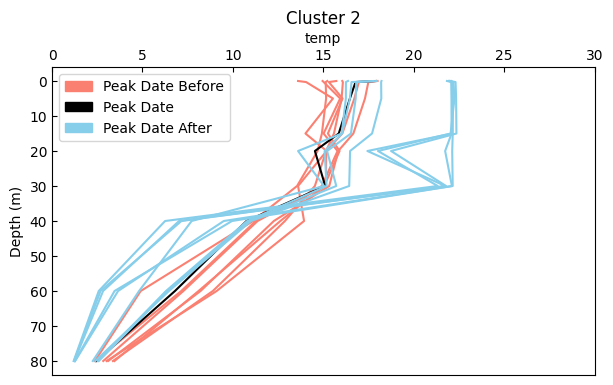

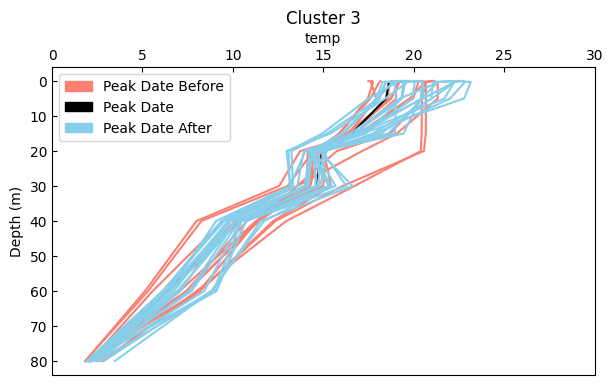

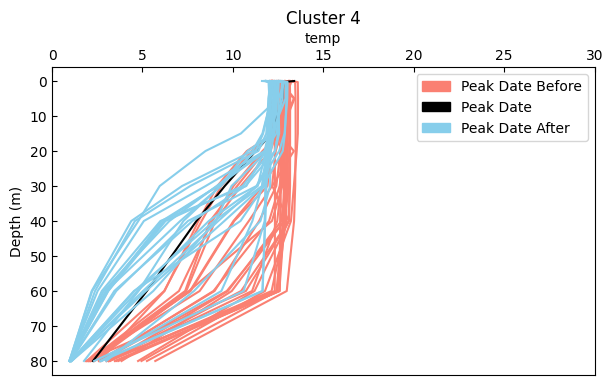

In [ ]:
for i, cluster in enumerate(clusters) :
  running_time = pd.to_numeric(cluster.index)
  plt.figure(figsize = (7,4))
  for j, time in enumerate(running_time):
    linestyle = '-'
    if time < 0 :
        color =  'salmon' #pink
    elif time > 0:
        color =  'skyblue' #sky blue
    else:
        color = 'k'
    plt.plot(cluster.iloc[j], depth_col, label=time, linestyle=linestyle, color=color)
  plt.gca().invert_yaxis()
  plt.gca().xaxis.set_ticks_position("top")
  plt.gca().xaxis.set_label_position("top")
  plt.tick_params(axis="both", direction="in")
  plt.legend()
  plt.xlabel('temp')
  plt.ylabel('Depth (m)')
  plt.title(f'Cluster {i + 1}')
  plt.xlim(0,30)

  before = mpatches.Patch(color='salmon',label='Peak Date Before')
  peak_date = mpatches.Patch(color='k',label='Peak Date')
  after = mpatches.Patch(color='skyblue',label='Peak Date After')

  plt.legend(handles=[before , peak_date , after])
  plt.show()

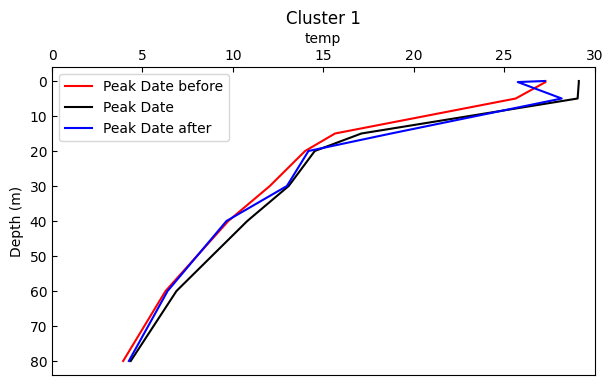

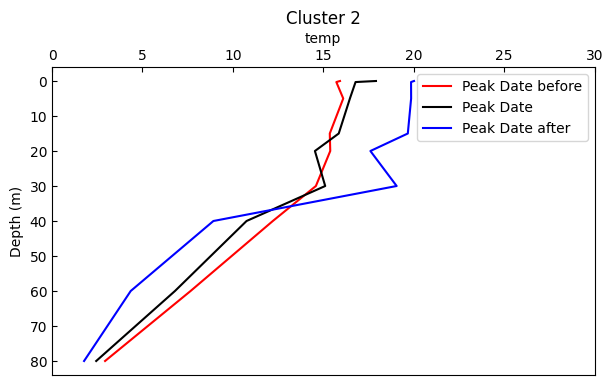

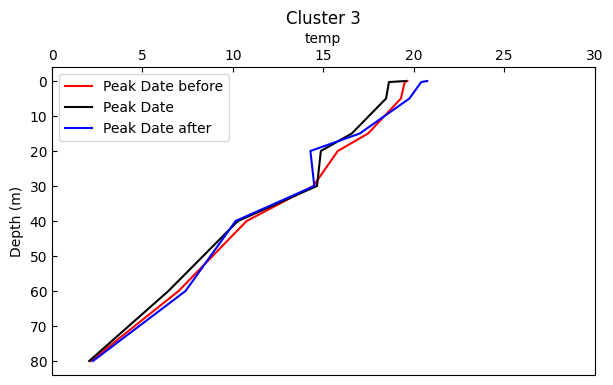

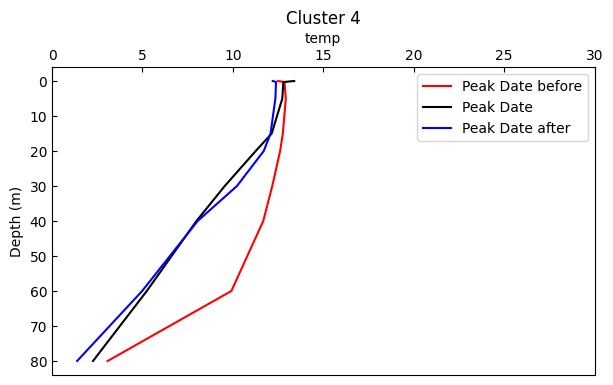

In [ ]:
for i, cluster in enumerate(clusters) :
  running_time = cluster.index
  plt.figure(figsize = (7,4))
  time_before_index =[]
  time_after_index =[]
  for j, time in enumerate(running_time):
    if pd.to_numeric(time) < 0 :
      time_before = cluster.index.get_loc(time)
      time_before_index.append(time_before)
  before = cluster.iloc[min(time_before_index) : max(time_before_index)+1]
  before_mean = before.mean(axis=0).T
  plt.plot(before_mean, depth_col, label='Peak Date before', color="red" ,linestyle = "-")

  for j, time in enumerate(running_time):
    if pd.to_numeric(time) == 0 :
      time_0 = cluster.index.get_loc('0')
  plt.plot(cluster.iloc[time_0], depth_col, label= 'Peak Date', color="k" )

  for j, time in enumerate(running_time):
    if 0 <= pd.to_numeric(time) > 0 :
      time_after = cluster.index.get_loc(time)
      time_after_index.append(time_after)
  after = cluster.iloc[min(time_after_index) : max(time_after_index)+1]
  after_mean = after.mean(axis=0).T
  plt.plot(after_mean, depth_col, label='Peak Date after', color="blue" ,linestyle = "-")

  plt.gca().invert_yaxis()
  plt.gca().xaxis.set_ticks_position("top")
  plt.gca().xaxis.set_label_position("top")
  plt.tick_params(axis="both", direction="in")
  plt.legend()
  plt.xlabel('temp')
  plt.ylabel('Depth (m)')
  plt.title(f'Cluster {i + 1}')
  plt.xlim(0,30)
plt.show()

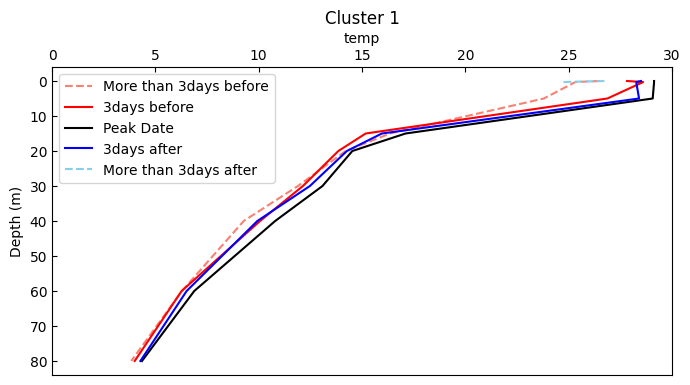

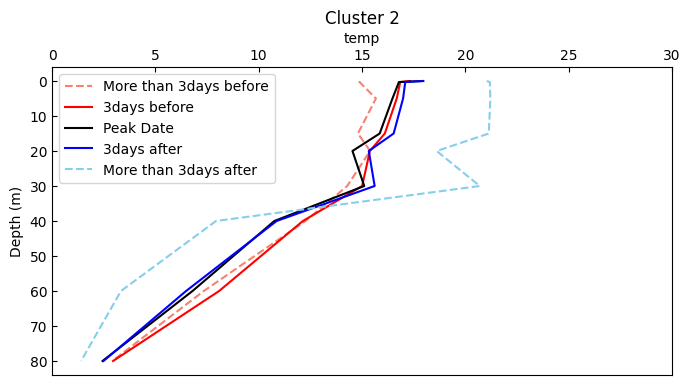

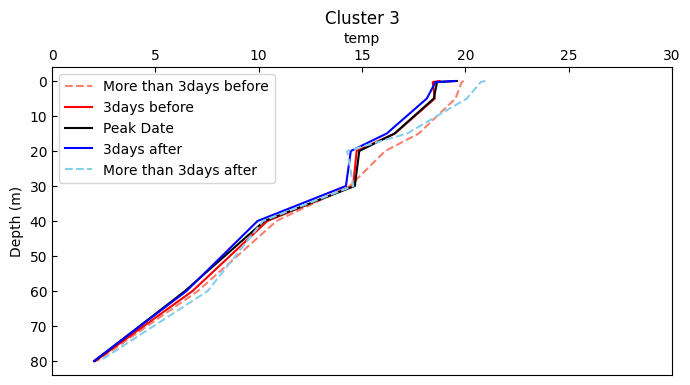

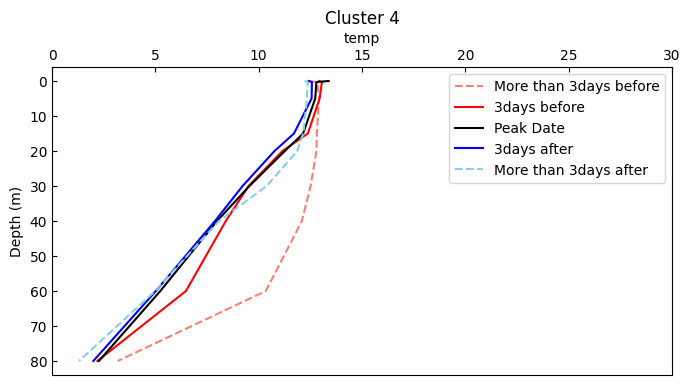

In [ ]:
for i, cluster in enumerate(clusters) :
  running_time = cluster.index
  plt.figure(figsize = (8,4))
  time_before_index =[]
  time_before_index1 =[]
  time_after_index =[]
  time_after_index1 =[]
  for j, time in enumerate(running_time):
    if pd.to_numeric(time) < -3 :
      time_before = cluster.index.get_loc(time)
      time_before_index.append(time_before)
  before = cluster.iloc[min(time_before_index) : max(time_before_index)+1]
  before_mean = before.mean(axis=0).T
  plt.plot(before_mean, depth_col, label='More than 3days before', color="salmon" ,linestyle = "--")

  for j, time in enumerate(running_time):
    if -3 <= pd.to_numeric(time) < 0:
      time_before = cluster.index.get_loc(time)
      time_before_index1.append(time_before)
  before = cluster.iloc[min(time_before_index1) : max(time_before_index1)+1]
  before_mean = before.mean(axis=0).T
  plt.plot(before_mean, depth_col, label='3days before', color="red" ,linestyle = "-")

  for j, time in enumerate(running_time):
    if pd.to_numeric(time) == 0 :
      time_0 = cluster.index.get_loc('0')
  plt.plot(cluster.iloc[time_0], depth_col, label= 'Peak Date', color="k" )

  for j, time in enumerate(running_time):
    if 0 <= pd.to_numeric(time) <= 3 :
      time_after = cluster.index.get_loc(time)
      time_after_index.append(time_after)
  after = cluster.iloc[min(time_after_index) : max(time_after_index)+1]
  after_mean = after.mean(axis=0).T
  plt.plot(after_mean, depth_col, label='3days after', color="blue" ,linestyle = "-")

  for j, time in enumerate(running_time):
    if  pd.to_numeric(time) > 3 :
      time_after = cluster.index.get_loc(time)
      time_after_index1.append(time_after)
  after = cluster.iloc[min(time_after_index1) : max(time_after_index1)+1]
  after_mean = after.mean(axis=0).T
  plt.plot(after_mean, depth_col, label='More than 3days after', color="skyblue" ,linestyle = "--")


  plt.gca().invert_yaxis()
  plt.gca().xaxis.set_ticks_position("top")
  plt.gca().xaxis.set_label_position("top")
  plt.tick_params(axis="both", direction="in")
  plt.legend()
  plt.xlabel('temp')
  plt.ylabel('Depth (m)')
  plt.title(f'Cluster {i + 1}')
  plt.xlim(0,30)
plt.show()

Peak Date

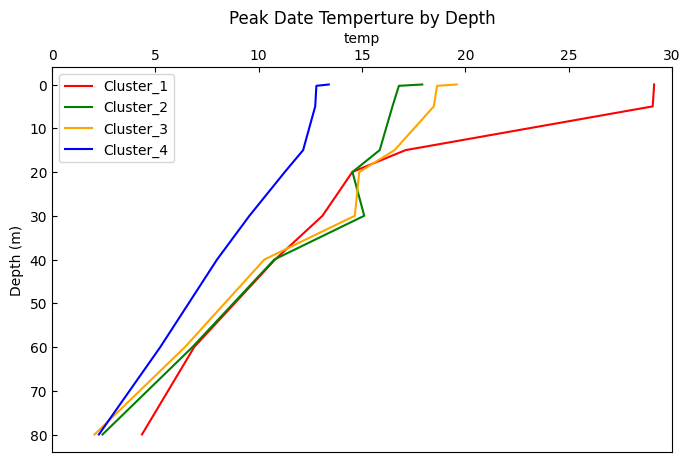

In [ ]:
colors = ["r", "g", "orange", "b"]
plt.figure(figsize = (8,5))
for i, cluster in enumerate(clusters):
    time_0 = cluster.index.get_loc('0')
    plt.plot(cluster.iloc[time_0], depth_col, label=f'Cluster_{i + 1}', color=colors[i])

plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.xlabel('temp')
plt.ylabel('Depth (m)')
plt.title('Peak Date Temperture by Depth')
plt.xlim(0, 30)
plt.show()


Peak Date before

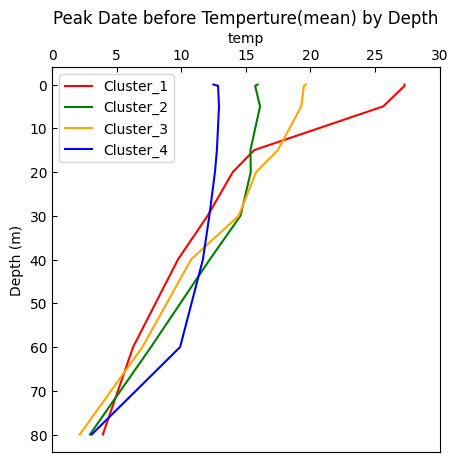

In [ ]:
colors = ["r", "g", "orange", "b"]
plt.figure(figsize = (5,5))

for i, cluster in enumerate(clusters):
  running_time = cluster.index
  time_before_index =[]
  for j, time in enumerate(running_time):
    if pd.to_numeric(time) < 0 :
      time_before = cluster.index.get_loc(time)
      time_before_index.append(time_before)
  before = cluster.iloc[min(time_before_index) : max(time_before_index)+1]
  before_mean = before.mean(axis=0).T
  plt.plot(before_mean, depth_col, label=f'Cluster_{i + 1}', color=colors[i])
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.xlabel('temp')
plt.ylabel('Depth (m)')
plt.title('Peak Date before Temperture(mean) by Depth')
plt.xlim(0, 30)
plt.show()


peak date after

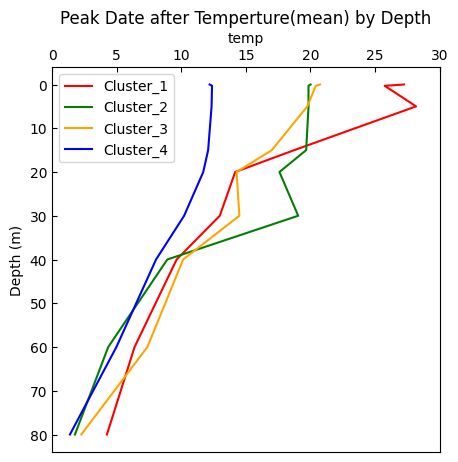

In [ ]:
colors = ["r", "g", "orange", "b"]
plt.figure(figsize = (5,5))
for i, cluster in enumerate(clusters):
  running_time = cluster.index
  time_after_index =[]
  for j, time in enumerate(running_time):
    if pd.to_numeric(time) > 0 :
      time_after = cluster.index.get_loc(time)
      time_after_index.append(time_after)
  after = cluster.iloc[min(time_after_index) : max(time_after_index)+1]
  after_mean = after.mean(axis=0).T
  plt.plot(after_mean, depth_col, label=f'Cluster_{i + 1}', color=colors[i])
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.xlabel('temp')
plt.ylabel('Depth (m)')
plt.title('Peak Date after Temperture(mean) by Depth')
plt.xlim(0, 30)
plt.show()
